In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
x = np.linspace(0,1,30)
t = np.linspace(0,2,50)
X,T = np.meshgrid(x,t)

In [58]:
def px(x):
  dp = 1
  x1 = .55
  h1  = .35
  z = np.abs(x-x1)/h1
  if z <1:
    return dp*(1-z)
  return 0

def tochnoye_pesheniye(X,T):
  u = np.zeros(T.shape)
  p = np.zeros(T.shape)
  u[:,0] = 0
  u[:,-1] = 0
  u[0,:] = 0
  p0 = 100
  c0 = 0.01
  w = 1/(p0*c0)
  for i in range(1,len(T[:,0])):
    for j in range(1,len(T[0,:])):
      xp = X[0,:][j] - c0*T[:,0][i]
      xn = X[0,:][j] + c0*T[:,0][i]
      p[i,j] = .5*(px(xp)+px(xn))
      u[i,j] = .5*w*(px(xp)-px(xn))
  return u,p

Text(0.5, 0, '$u(x,t)$')

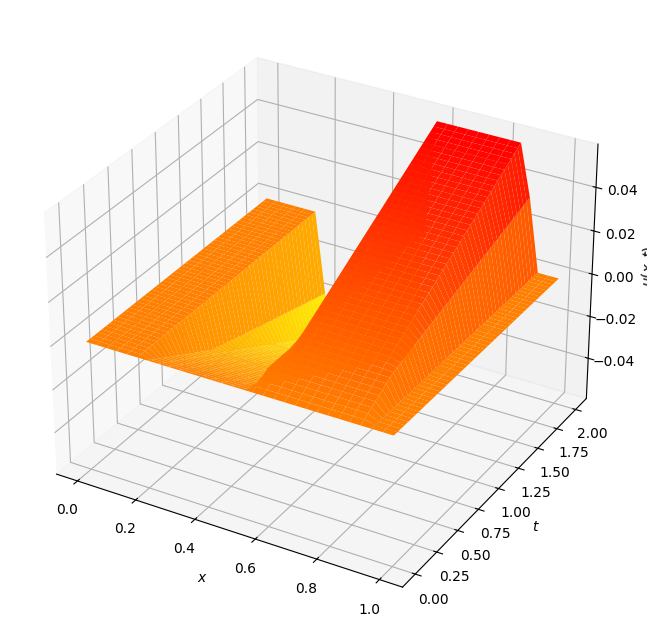

In [60]:
u,p =  tochnoye_pesheniye(X,T)
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X,T, u,cmap = 'autumn_r')
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_zlabel("$u(x,t)$")

Text(0.5, 0, '$p(x,t)$')

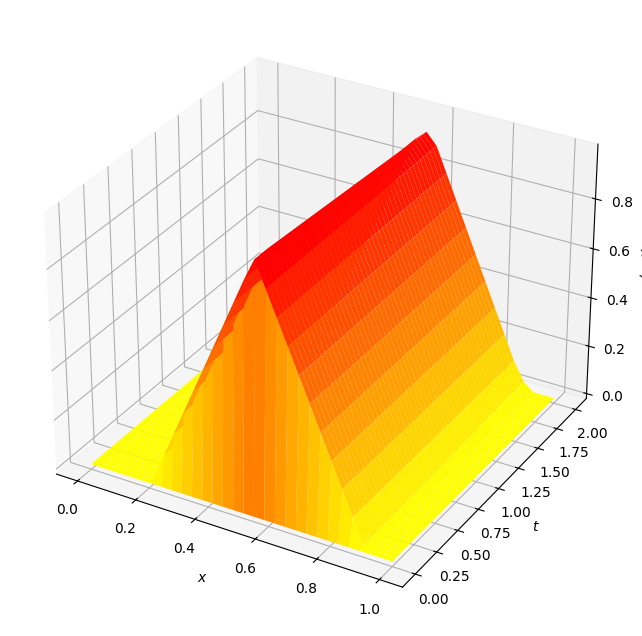

In [31]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X,T, p,cmap = 'autumn_r')
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_zlabel("$p(x,t)$")

In [66]:
def rimani_invariant(X,T):
  u = np.zeros(T.shape)
  p = np.zeros(T.shape)
  u[:,0] = 0
  u[:,-1] = 0
  u[0,:] = 0
  p0 = 100
  c0 = 0.01
  w = 1/(p0*c0)
  h = X[0,:][1]-X[0,:][0]
  tau = T[:,0][1]-T[:,0][0]

  for j in range(len(T[0,:])):
    p[0,j] = px(X[0,j])

  Y = u + w*p
  Z = u - w*p

  for i in range(0,len(T[:,0]) - 1):
    for j in range(1,len(T[0,:])):
      Y[i+1,j] = Y[i,j] + c0*tau*(Y[i,j] - Y[i,j-1])/h

  for i in range(0,len(T[:,0]) -1):
    for j in range(0,len(T[0,:])-1):
      Z[i+1,j] = Z[i,j] + c0*tau*(Z[i,j+1] - Z[i,j])/h

  u = (Y+Z)/2
  p = (Y - Z)/(2*w)
  return u,p

Text(0.5, 0, '$u(x,t)$')

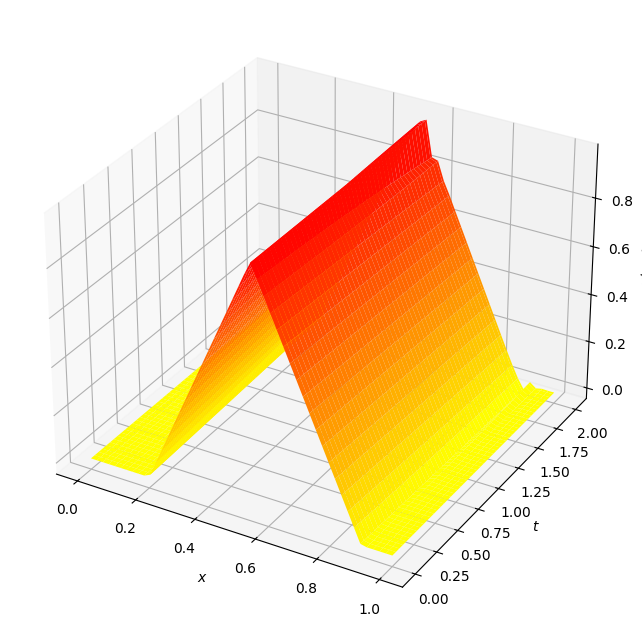

In [64]:
x = np.linspace(0,1,50)
t = np.linspace(0,2,100)
X,T = np.meshgrid(x,t)
u1,p1 = rimani_invariant(X,T)
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X,T, p1,cmap = 'autumn_r')
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_zlabel("$u(x,t)$")


Text(0.5, 0, '$u(x,t)$')

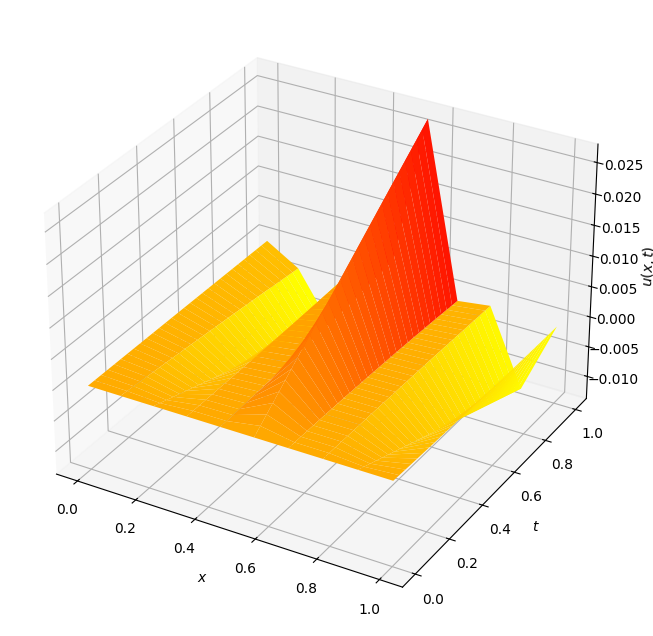

In [77]:
x = np.linspace(0,1,10)
t = np.linspace(0,1,30)
X,T = np.meshgrid(x,t)
u1,p1 = rimani_invariant(X,T)
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X,T, u1,cmap = 'autumn_r')
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_zlabel("$u(x,t)$")
